In [40]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time 
import astropy
import astropy.units as u
from astropy.coordinates import Angle
from astropy.visualization import quantity_support
import astroquery
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord

Graph parameter space of proper motions in RA and DEC to compare those of the pulsar to the gaia matches 

Text(0, 0.5, '$\\mu_{\\delta}$ (mas)')

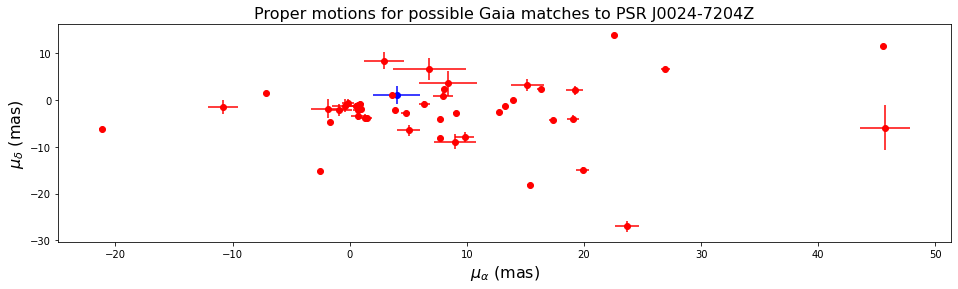

In [85]:
# instantiate a figure and axis object where we will plot everything relating to the pm parameter space 
fig, ax = plt.subplots(figsize=(16,4)) 

# create variables for pmra, pmdec, and their errors
pmra = 4 * u.mas / u.yr
pmra_err = 2 * u.mas / u.yr
pmdec = 1 * u.mas / u.yr
pmdec_err = 2 * u.mas / u.yr

# plot the \mu in \alpha and \delta of the actual pulsar 
with quantity_support(): # to make sure astropy quantities get plotted properly 
    ax.errorbar(pmra, pmdec, pmdec_err, pmra_err, 'bo') 

# read the csv file containing the gaia "matches" identified by get_matches()
f = open('testing_output.csv', 'r')
not_zero = 0 # counter that skips the first line in the text file, which is just a header 
for line in f:
    values = line.split(',') # create a table containing the values of a given line of the file
    if not_zero == 0:
        not_zero+=1 # skips the first line of the file 
    elif values[0] == 'J0024-7204Z': # only looks at matches to the pulsar we are concerned about 
        if values[14] != '': # avoids entries that don't have a pm measurement 
            with quantity_support(): # plot the pm's of a gaia object with error bars 
                ax.errorbar(float(values[14]), float(values[16]), float(values[15]), float(values[17]), 'ro')
    else:
        break # break once it has gone through every match for the given pulsar; we will have to modify this to work 
              # generically once we put it in a function 

ax.set_title('Proper motions for possible Gaia matches to PSR J0024-7204Z', fontsize=16)
ax.set_xlabel(r'$\mu_{\alpha}$ (mas)', fontsize=16)
ax.set_ylabel(r'$\mu_{\delta}$ (mas)', fontsize=16)


Graph RA and DEC of the pulsar and all the Gaia "matches" given from get_matches()

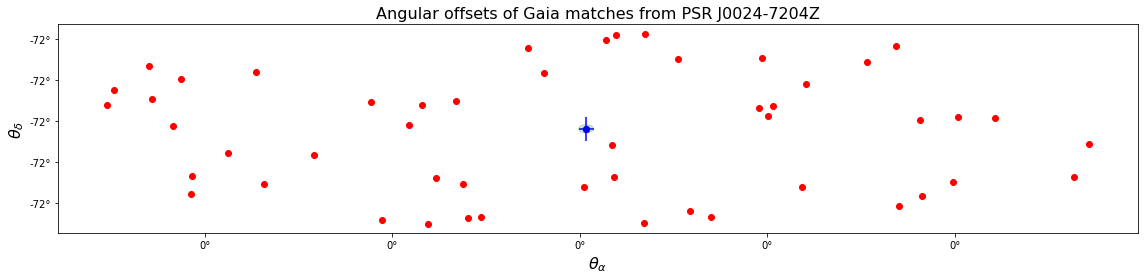

In [99]:
fig1, ax1 = plt.subplots(figsize=(16,4)) 

ra = '00:24:06.041'
dec = '-72:05:01.480'
ra_err = .002*u.deg # must be floats
dec_err = .006*u.deg # must be floats

ra_ang = Angle(ra, u.deg)
dec_ang = Angle(dec, u.deg)

# this part is to plot the region within the propogated error after updating to the gaia epoch

posepoch = 51600

p_epoch = Time(posepoch, format='mjd').jyear
gaia_epoch = 2015.5 * u.yr
year_diff = gaia_epoch - p_epoch.tolist() * u.yr

bound1 = (ra_ang + ra_err) + ((pmra.to(u.deg/u.yr) + pmra_err.to(u.deg/u.yr))*year_diff) # right x err
bound2 = (dec_ang + dec_err) + ((pmdec.to(u.deg/u.yr) + pmdec_err.to(u.deg/u.yr))*year_diff) # top y err

bound3 = (ra_ang - ra_err) + ((pmra.to(u.deg/u.yr) - pmra_err.to(u.deg/u.yr))*year_diff) # left x err
bound4 = (dec_ang - dec_err) + ((pmdec.to(u.deg/u.yr) - pmdec_err.to(u.deg/u.yr))*year_diff) # bottom y err

bounds = [bound1, bound3, bound2, bound4]

asym_err_x = [[bound3], [bound1]]
asym_err_y = [[bound4], [bound2]]

largest_err = 0
for bound in bounds:
    if bound > largest_err:
        largest_err = bound 

new_ra = ra_ang + (pmra.to(u.deg/u.yr)*year_diff)
new_dec = dec_ang + (pmdec.to(u.deg/u.yr)*year_diff)

region = plt.Circle((new_ra, new_dec), largest_err-new_ra, color='g', alpha=0.2)

# plot the \mu in \alpha and \delta of the actual pulsar 
with quantity_support():
    ax1.errorbar(ra_ang, dec_ang, dec_err, ra_err, 'bo') 
    ax1.plot(new_ra, new_dec, 'bo')
    ax1.add_patch(region)
# plt.xlim([-1,2])
# plt.ylim([-75,70])

f = open('testing_output.csv', 'r')
not_zero = 0
for line in f:
    values = line.split(',')
    if not_zero == 0:
        not_zero+=1
    elif values[0] == 'J0024-7204Z':
        # if float(values[8]) <= 0.1 and float(values[10]) <= 0.1:
            with quantity_support():
                ax1.errorbar(float(values[7])*u.deg, float(values[9])*u.deg, float(values[8])*u.mas,
                 float(values[10])*u.mas, 'ro')
    else:
        break

ax1.set_title('Angular offsets of Gaia matches from PSR J0024-7204Z', fontsize=16)
ax1.set_xlabel(r'$\theta_{\alpha}$', fontsize=16)
ax1.set_ylabel(r'$\theta_{\delta}$', fontsize=16)

plt.tight_layout()

I have been thoroughly confused about the units on RA, DEC, PMRA, and PMDEC and their errors for both ATNF and Gaia, so
this is trying to clear that up 

In [41]:
# Query Gaia within the range of the given pulsar 
coord=SkyCoord(ra=ra_ang, dec=dec_ang, unit=(u.degree, u.degree), frame='icrs')
width_gaia = u.Quantity(1., u.arcmin)
height_gaia = u.Quantity(1., u.arcmin)
results = Gaia.query_object_async(coordinate=coord, width=width_gaia, height=height_gaia)

results.info()


INFO: Query finished. [astroquery.utils.tap.core]
<Table length=0>
              name                dtype       unit                                          description                                     
-------------------------------- ------- ------------- -------------------------------------------------------------------------------------
                            dist float64                                                                                                    
                     solution_id   int64                                                                                 Solution Identifier
                     DESIGNATION  object                                         Unique source designation (unique across all Data Releases)
                       source_id   int64                                  Unique source identifier (unique within a particular Data Release)
                    random_index   int64                                               